In [5]:
import pandas as pd
import numpy as np

from UtilityFunctions.get_data_path import get_path
from UtilityFunctions.flatten_dict import flatten_dictionary

biz = pd.read_json(get_path("yelp_academic_dataset_business.json"), lines=True)
usr = pd.read_json(get_path("yelp_academic_dataset_user.json"), lines=True)
usr

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
biz

In [3]:
# Number of businesses
query = """

SELECT COUNT(?biz)
FROM
WHERE {
?biz rdfs:Class schema:LocalBusiness .
}

"""

len(biz["business_id"].unique())

150346


In [6]:
# Number of users
query = """

SELECT COUNT(?users)
FROM
WHERE {
?user rdfs:Class schema:Person .
}
"""

len(usr["user_id"].unique())

1987897

In [63]:
# Number of unique predicates
query = """

SELECT DISTINCT ?p
FROM
WHERE {
?s ?p ?o .
}
"""

# NOTE: THIS NEEDS TO BE DONE FOR ALL KG's of interest
non_predicates = ["business_id", "attributes", "hours"]

predicates = biz.columns
predicates = list(predicates.drop(non_predicates))

predicates += ["url", "a"]

n_general_predicates = len(predicates)

## ------ ##
attribute_predicates = set()
hour_predicates = set()

for i in range(len(biz)):
    if biz["attributes"][i]:
        attribute_predicates.update(flatten_dictionary(biz["attributes"][i]).keys())
    if biz["hours"][i]:
        hour_predicates.update(flatten_dictionary(biz["hours"][i]).keys())

n_attribute_predicates = len(attribute_predicates)
n_hour_predicates = len(hour_predicates)

n_general_predicates + n_attribute_predicates + n_hour_predicates

108

##### Star ratings

stars
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.5    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.5    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.5    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.5    AxesSubplot(0.125,0.125;0.775x0.755)
5.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: stars, dtype: object

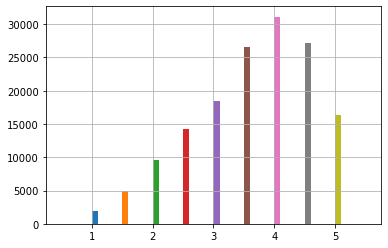

In [82]:
# Rate distribution
query = """

SELECT ?rating COUNT(?biz)
FROM
WHERE {
?biz rdfs:Class schema:LocalBusiness .
?biz schema:starRating ?rating .
}
GROUP BY ?rating

"""

biz.groupby('stars')['stars'].hist()#count()

In [68]:

#Total average rating
query = """

SELECT AVG(?rating) as ?averagerating
FROM
WHERE {
?biz schema:starRating ?rating .
}

"""

biz['stars'].mean()

3.5967235576603303


##### Geographical areas

In [86]:
#Number of businesses in different regions
query = """

SELECT ?state COUNT(?biz)
FROM
WHERE {
?biz rdfs:Class schema:LocalBusiness .
?biz schema:adressRegion ?state .
}
GROUP BY ?state

"""

biz["business_id"][biz["city"] == "Abington"].unique().size

169

In [100]:
# Area with lowest average rating
query = """

SELECT ?state AVG(?rating) as ?averagerating
FROM
WHERE {
?biz schema:adressRegion ?state .
?biz schema:starRating ?rating .
}
GROUP BY ?state
ORDER BY DESC(?averagerating)

"""

biz.groupby("state")['stars'].mean().sort_values().index[0]#.min()

'MA'

##### Categories

In [ ]:
# Different categories and numbers of businesses with that category
query = """

SELECT ?category COUNT(?biz)
FROM
WHERE {
    ?biz schema:category ?category .
}
GROUP BY ?category

"""

def str_split(string):
    if isinstance(string, str):
        return string.split(", ")
    else:
        return string


biz["categories"] = biz["categories"].apply(str_split)

category_biz_count = {}
for i in range(len(biz)):
    if biz["categories"][i]:
        for category in biz["categories"][i]:
            category_biz_count[category] = category_biz_count.get(category, 0) + 1

category_biz_count["Restaurants"]